# Google Location History

[Author Reference for the origninal Notebook ](https://github.com/gboeing/data-visualization/blob/master/location-history/google-location-history-simple.ipynb)

The Notebook has been adapted to Google Colaboratory by Denis Rothman, MIT License

## Installing packages for BaseMap

Uncomment the three following cells to install the geographic and basemap packages. Then comment them and restart the runtime.

[Official basemap installation documentation](https://matplotlib.org/basemap/users/installing.html)

In [1]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [2]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

  Using cached https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
  Created wheel for basemap: filename=basemap-1.1.0-cp36-cp36m-linux_x86_64.whl size=121632062 sha256=e45db837d3f7370a60d54d26fa751169932ac118531d1b0352266ca08ef342db
  Stored in directory: /tmp/pip-ephem-wheel-cache-3o48php5/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
Successfully built basemap


## Updateing basemap to make sure

In [3]:
!pip install -U git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-cdlev2y1
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-cdlev2y1
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756034 sha256=1aeed0d05b92c92d3bb14c679aa5f85dcd4d947380fbfa3627477083058fd0c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-jmpbua48/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
Successfully built basemap
  Found existing installation: basemap 1.1.0
    Uninstalling basemap-1.1.0:
      Successfully uninstalled basemap-1.1.0


# Header

In [0]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os

In [5]:
#@title Importing data <br> repository is set to "google"(default) to read the data from Google Drive {display-mode: "form"}
import os
from google.colab import drive

#Set repository to "github" to read the data from GitHub 
#Set repository to "google" to read the data from Google
repository="google" 

#if repository=="github":
# Location_History.json is too large for GitHub 

if repository=="google":
  #Mounting the drive. If it is not mounted, a prompt will provide instructions.
  drive.mount('/content/drive')
  #Setting the path for each file
  df2='/content/drive/My Drive/XAI/Chapter01/Location_History.json'
  print(df2)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/XAI/Chapter01/Location_History.json


# Opening the file

In [6]:
df_gps = pd.read_json(df2)
print('There are {:,} rows in the location history dataset'.format(len(df_gps)))

There are 123,143 rows in the location history dataset


## Parse the latitude, longitude and the timestamp from the dictionary inside the locations columns

In [0]:
df_gps['lat'] = df_gps['locations'].map(lambda x: x['latitudeE7'])
df_gps['lon'] = df_gps['locations'].map(lambda x: x['longitudeE7'])
df_gps['timestamp_ms'] = df_gps['locations'].map(lambda x: x['timestampMs'])

In [8]:
print(df_gps)

                                                locations  ...   timestamp_ms
0       {'timestampMs': '1468992488806', 'latitudeE7':...  ...  1468992488806
1       {'timestampMs': '1468992524778', 'latitudeE7':...  ...  1468992524778
2       {'timestampMs': '1468992760000', 'latitudeE7':...  ...  1468992760000
3       {'timestampMs': '1468992775000', 'latitudeE7':...  ...  1468992775000
4       {'timestampMs': '1468992924000', 'latitudeE7':...  ...  1468992924000
...                                                   ...  ...            ...
123138  {'timestampMs': '1553429840319', 'latitudeE7':...  ...  1553429840319
123139  {'timestampMs': '1553430033166', 'latitudeE7':...  ...  1553430033166
123140  {'timestampMs': '1553430209458', 'latitudeE7':...  ...  1553430209458
123141  {'timestampMs': '1553514237945', 'latitudeE7':...  ...  1553514237945
123142  {'timestampMs': '1553514360002', 'latitudeE7':...  ...  1553514360002

[123143 rows x 4 columns]


## Converting latitude and longitude de decimalized degrees and the timestamp to date-time

In [0]:
df_gps['lat'] = df_gps['lat'] / 10.**7
df_gps['lon'] = df_gps['lon'] / 10.**7
df_gps['timestamp_ms'] = df_gps['timestamp_ms'].astype(float) / 1000
df_gps['datetime'] = df_gps['timestamp_ms'].map(lambda x: dt.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
date_range = '{}-{}'.format(df_gps['datetime'].min()[:4], df_gps['datetime'].max()[:4])

## Dropping columns that are not necessary and show a slice of the dataframe

In [0]:
df_gps = df_gps.drop(labels=['locations', 'timestamp_ms'], axis=1, inplace=False)

In [11]:
df_gps[1000:1005]

,lat,lon,datetime
1000,49.010427,2.567411,2016-07-29 21:16:01
1001,49.011505,2.567486,2016-07-29 21:16:31
1002,49.011341,2.566974,2016-07-29 21:16:47
1003,49.011596,2.568414,2016-07-29 21:17:03
1004,49.011756,2.570905,2016-07-29 21:17:19


## Mapping the dataset : defining the colors

In [0]:
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

## Mapping the dataset 
1.creating the plot <br>
2.draw the basemap <br>

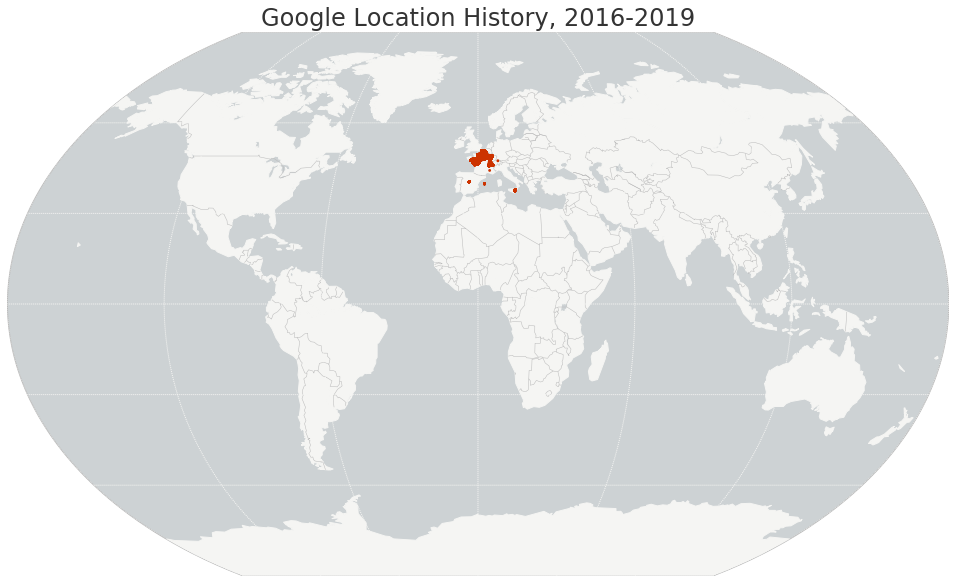

In [13]:
# creating the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Google Location History, {}'.format(date_range), fontsize=24, color='#333333')

#drawing the basemap and its features
m = Basemap(projection='kav7', lon_0=0, resolution='c', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# projecting the location history points and then scatter plotting them
x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=8, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# showing the map
plt.show()

## A section of the map : first defining a traverse mercator for the location

In [0]:
lon=1;lat=50
map_width_m = 1000 * 1000
map_height_m = 1200 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':1,
              'lat_0':50.5}

## Plotting the selected section the map

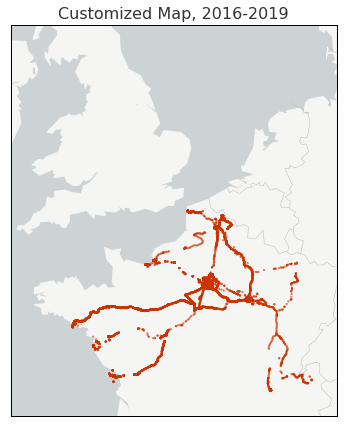

In [15]:
fig_width = 6
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Customized Map, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)
plt.show()

## Zooming in

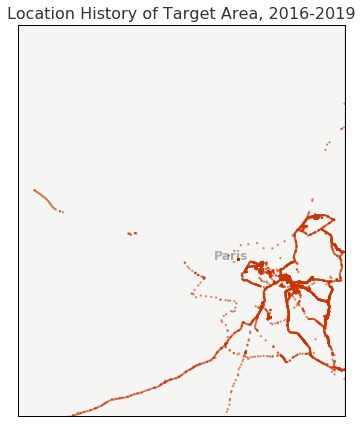

In [16]:
# define a transverse mercator projection centered on your target area
map_width_m = 100 * 1000
map_height_m = 120 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':2,
              'lat_0':49}

# defining how to display the annotations
color = 'k'
weight = 'black'
size = 12
alpha = 0.3
xycoords = 'axes fraction'

# ploting the map
fig_width = 6
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('Location History of Target Area, {}'.format(date_range), fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='h',
            area_thresh=10)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(df_gps['lon'].values, df_gps['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

# annotating a city
plt.annotate('Paris', xy=(0.6, 0.4), xycoords=xycoords, color=color, weight=weight, size=size, alpha=alpha)

# showing the map
plt.show()